#  Data Cleaning



After looking into my dataset and reviewing what categorical and numerical data I will require for my analysis, I will start by cleaning the dataset by:
  1. Dropping columns that are unnecessary for my analysis
  2. Checking for missing values
  3. Rectifying column arrangement for uniformity
  4. Checking for outliers and eliminating them
  5. Checking and dropping duplicates
  6. Changing data types for uniformity

I will start by importing the necessary libraries for data cleaning. They are pre-written codes that provide a specific functionality in our case data cleaning and analysis.

In [1]:
# Importing the various libraries used for data cleaning and analysis
# We assign each library an alias for instance the alias for pandas is pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 

After importing the various libraries I will load the dataset to my notebook.

In [2]:
#Loading the dataset
#Assign the notebook a variable df:
df = pd.read_csv("AviationData.csv", encoding='latin1')
#To confirm the dataset has been uploaded in the notebook we either use df(it will upload the first and last five rows)
df
#Similarly we can select the first five rows only by using df.head() and the last five rows only by running df.tail()


C:\Users\123\AppData\Local\Temp\ipykernel_6620\692569652.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


When loading the dataset in my code you notice encoding='latin1'in some cases the code will still run without including latin1 but in my case I had to include it to ensure python correctly interpretes the file content.

Before cleaning we will create a copy to retain the contents of the origin for further analysis if need be


In [3]:
#I will run the code below to create a copy by assigning the variable df1
df1=df.copy(deep=True)
#To confirm the copy has been upload run df1
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Dropping the columns

Here I will drop some the columns that are not necessary for my analysis, to easen the analysis process

In [4]:
#I will use the code df1.drop to drop the columns
df1.drop(["Event.Id","Accident.Number","Airport.Code"],axis=1,inplace=True)
#We use axis=1 when dealing with columns
#Inplace modifies the objects without creating a new copy

In [5]:
#To confirm the columns have been removed I use df1.columns
df1.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Changing column format :

For uniformity I will change the format to title

In [6]:
#I will use the code below to change the column format to title we assign df1.columns as a variable and use the .title() 
df1.columns=df1.columns.str.title()
#I will run the code df1.columns to confirm the change
df1.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.Of.Engines', 'Engine.Type', 'Far.Description',
       'Schedule', 'Purpose.Of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.Of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In our dataset we notice the punctuation is incorrect we will replace the fullstops(.) with whitespaces(" ")

In [7]:
#To replace the fullstops(.) with whitespaces(" ") we run the code below
df1.columns=df1.columns.str.replace("."," ")
#Use df1.columns to confirm changes
df1.columns

Index(['Investigation Type', 'Event Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

## Checking for missing values:

We need to check for any missing values and rectify them to avoid problems during analysis. We do this by running the codes below:

In [8]:
#Checking for missing values for the entire dataset we use the .isnull().sum().any()
df1.isnull().sum().any()
#If the result is true it indicates that there are missing values from the data set
#However if it indicates false it means the dataset lacks missing values

True

For our case the dataset has missing values and hence we can check the number of missing values in each column by running the code below

In [9]:
#checking for missing vaues for each columns we use .isna().sum()
df1.isna().sum()

Investigation Type            0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: int64

In our case we have a lot of missing values. We can rectify the missing values for numerical values filling in statistical measures such mean, mode or median

We start by checking the skewness of the numerical information by plotting a histogram or kdeplot

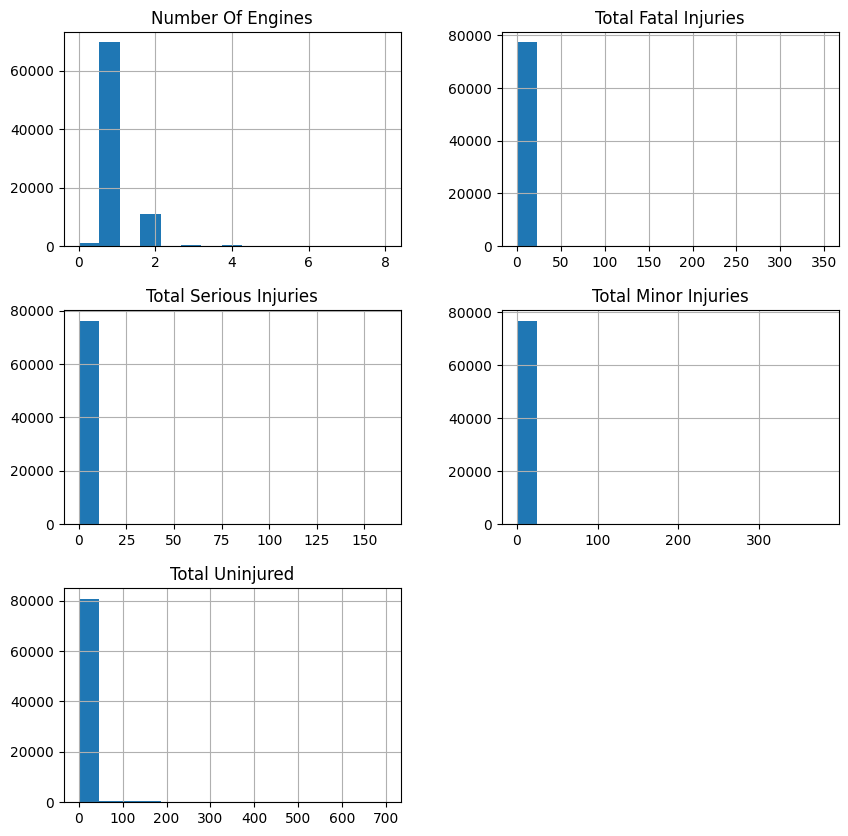

In [10]:
#plotting the histogram 
df1.hist(bins=15,figsize=(10,10));

Since the plots show the distribution is positively skewed(right skewed) mode will be the most appropriate method to use, as it indicates the most frequent value.

In [11]:
#To input the missing values for all numeric data we will use for loop for easier manipulation:
for column in df1.select_dtypes(include=["number"]).columns:
        df1[column].fillna(df1[column].mode()[0],inplace=True)

In [12]:
#To confirm that all numeric values lack missing data we will run
df1.isna().sum()

Investigation Type            0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines             0
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries          0
Total Serious Injuries        0
Total Minor Injuries          0
Total Uninjured               0
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: int64

Confirmed that all numeric missing values have been cartered for. Hence will proceed by filling object category by inputing the word ("unknown")

In [13]:
#We also run the code using for loop
for column in df1.select_dtypes(include=["object"]).columns:
    df1[column].fillna("Unknown",inplace=True)

In [14]:
#for confirmation that all missing values have been erased for the entire dataset
df1.isnull().sum().any()

False

In [15]:
df1

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Fatal(4),Destroyed,Unknown,...,Personal,Unknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Fatal(3),Destroyed,Unknown,...,Personal,Unknown,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Fatal(1),Destroyed,Unknown,...,Personal,Unknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Unknown,Minor,Unknown,Unknown,...,Personal,Unknown,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022
88885,Accident,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown
88886,Accident,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAYSON,Non-Fatal,Substantial,Airplane,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,Accident,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown


The result will confirm that all the missing values have been rectified

## Checking for duplicates

We can check for the duplicated values by running the code below:

In [16]:
#We will use .duplicated().sum()
df1.duplicated().sum()

0

The result is (0) meaning the dataset is free of any duplicated value.

## Checking for outliers

To check for outliers will start by plotting a boxplot

<Axes: >

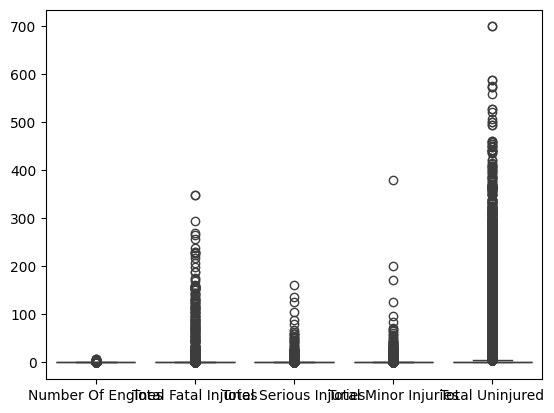

In [17]:
#we will use the seaborn library to plot
sns.boxplot(df1)

It is evident that the numeric values have a few outliers we will Inter-quantile Range(IQR) to remove the outliers

In [18]:
# Select only numeric columns from the dataframe
numeric_columns = df1.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df1[numeric_columns].quantile(0.25)
Q3 = df1[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data by keeping only values within the IQR bounds
df_no_outliers = df1[(df1[numeric_columns] >= lower_bound) & (df1[numeric_columns] <= upper_bound)]

df_no_outliers = df_no_outliers.dropna()


In [19]:
df1

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Fatal(4),Destroyed,Unknown,...,Personal,Unknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Fatal(3),Destroyed,Unknown,...,Personal,Unknown,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Fatal(1),Destroyed,Unknown,...,Personal,Unknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Unknown,Minor,Unknown,Unknown,...,Personal,Unknown,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022
88885,Accident,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown
88886,Accident,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAYSON,Non-Fatal,Substantial,Airplane,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,Accident,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown


## Cleaning each column being used for analysis:

Here I will be creating uniformity for each non-numeric column I will be using for my analysis to make analysis less complicated.
For instance some objects in the same column are in upper case while others in lower case, hence I will correct that 

In [20]:
#checking uniformity in location
df1["Location"].value_counts()

Location
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
MALLARDS LDG, GA      1
LODGEPOLE, MT         1
VERNILLION, SD        1
MCMECHEN, WV          1
Brasnorte,            1
Name: count, Length: 27758, dtype: int64

The last location is missing its state name compared to the other location hence I will replace its value with Unknown

In [21]:
#Replacing the location value
df1["Location"]=df1["Location"].replace("Brasnorte,","Unknown",regex=True)
#regex is a regular expression used to replace texts

In [22]:
#To confirm that all the changes have been made
df1["Location"].value_counts()

Location
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
MALLARDS LDG, GA      1
LODGEPOLE, MT         1
VERNILLION, SD        1
MCMECHEN, WV          1
Unknown               1
Name: count, Length: 27758, dtype: int64

For uniformity I will change the cases to title form

In [23]:
#Changing the cases to title
df1["Location"]=df1["Location"].str.title()

In [24]:
#Confirming the changes
df1["Location"].value_counts()

Location
Anchorage, Ak       548
Miami, Fl           275
Houston, Tx         271
Albuquerque, Nm     265
Chicago, Il         256
                   ... 
Medina, Mn            1
Circle Pines, Mn      1
Pine Island, Fl       1
Churchtown, Oh        1
Unknown               1
Name: count, Length: 21978, dtype: int64

In [25]:
#Checking for uniformity in the country column we run the code below
df1["Country"].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Saint Vincent and the Grenadines        1
Cambodia                                1
Malampa                                 1
AY                                      1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

We notice that the country AY was wrongly input or is incomplete hence we replace with unknown

In [26]:
#Replacing AY with Unknown
df1["Country"]=df1["Country"].replace("AY","Unknown",regex=True)

In [27]:
#Confirming the changes
df1["Country"].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Saint Vincent and the Grenadines        1
Cambodia                                1
Malampa                                 1
Belarus                                 1
Turks and Caicos Islands                1
Name: count, Length: 218, dtype: int64

In [28]:
#Checking uniformity for Airport Name
df1["Airport Name"].value_counts()

Airport Name
Unknown                           36192
Private                             240
PRIVATE                             224
Private Airstrip                    153
NONE                                146
                                  ...  
GEORGE CAMPERT MEMORIAL               1
WESTCHESTER COUNTY ARPT               1
IL VALLEY PARACHUTE CLUB              1
LAUGHLIN/BULLHEAD                     1
WICHITA DWIGHT D EISENHOWER NT        1
Name: count, Length: 24870, dtype: int64

As mentioned earlier, we notice there is a repetition of the word private in upper case and title case. We will change this to title case and the Private Airstrip to Private Strip to Private as well.

In [29]:
#Changing the texts to title case
df1["Airport Name"]=df1["Airport Name"].str.title()

In [30]:
#Confirming the changes
df1["Airport Name"].value_counts()

Airport Name
Unknown                           36261
Private                             471
Private Airstrip                    266
Private Strip                       161
None                                146
                                  ...  
Starbuck Muni                         1
Southwest Airpark                     1
Columbia Downtown                     1
Laama[A;O                             1
Wichita Dwight D Eisenhower Nt        1
Name: count, Length: 21566, dtype: int64

In [31]:
#Changing Private Strip, Private Airstrip to just private
df1["Airport Name"]=df1["Airport Name"].replace(["Private Strip","Private Airstrip"],"Private",regex=True)

In [32]:
#Changing None to Unknown
df1["Airport Name"]=df1["Airport Name"].replace("None","Unknown",regex=True)

In [33]:
#Confirming the changes
df1["Airport Name"].value_counts()

Airport Name
Unknown                           36407
Private                             898
Merrill Field                       109
Centennial                          102
Van Nuys                             97
                                  ...  
Roy'S Strip                           1
Greater Wilmingon                     1
Bell Helicopter Training              1
Stinson Fld.                          1
Wichita Dwight D Eisenhower Nt        1
Name: count, Length: 21563, dtype: int64

In [34]:
#Checking for uniformity in Injury Severity
df1["Injury Severity"].value_counts()

Injury Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [35]:
df1['Injury Severity'] = df1['Injury Severity'].str.replace(r'\(.*\)', '', regex=True)


In [36]:
df1["Injury Severity"].value_counts()

Injury Severity
Non-Fatal      67357
Fatal          17826
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [37]:
#Checking for any uniformity in this category
df1["Aircraft Damage"].value_counts()

Aircraft Damage
Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: count, dtype: int64

Uniformity is okay

In [38]:
#Checking for uniformity
df1['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

We notice some texts are in upper while others in title case. I will change the texts to title case

In [39]:
#Changing all the texts to title case
df1["Make"]=df1["Make"].str.title()

In [40]:
#Confirming the changes
df1['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [41]:
#Confirm uniformity
df1["Model"].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

No changes are required

In [42]:
#Checking for uniformity
df1["Engine Type"].value_counts()

Engine Type
Reciprocating      69530
Unknown             9147
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

We notice some values are in upper case while others in title case. I will change all texts to title case.
I will also replace none with unknown

In [43]:
#Changing the texts to title case
df1["Engine Type"]=df1["Engine Type"].str.title()

In [44]:
#Changing the text None to Unknown
df1["Engine Type"]=df1["Engine Type"].replace("None","Unknown",regex=True)

In [45]:
#Confirming the changes
df1["Engine Type"].value_counts()

Engine Type
Reciprocating      69530
Unknown             9149
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
Lr                     2
Hybrid Rocket          1
Unk                    1
Name: count, dtype: int64

In [46]:
#Confirming the uniformity
df1["Purpose Of Flight"].value_counts()

Purpose Of Flight
Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

We will change all cases to title case.

In [47]:
#Changing the cases to title
df1["Purpose Of Flight"]=df1["Purpose Of Flight"].str.title()

In [48]:
#Confirming the changes
df1["Purpose Of Flight"].value_counts()

Purpose Of Flight
Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/Corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race Show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/Show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Asho                             6
Pubs                             4
Publ                             1
Name: count, dtype: int64

In [49]:
#Checking for uniformity
df1["Weather Condition"].value_counts()

Weather Condition
VMC        77303
IMC         5976
Unknown     4492
UNK          856
Unk          262
Name: count, dtype: int64

Most cases are in upper cases perhaps they are initials because if they were to be written in full it would have bombarred the data set hence I will change to upper for all values for uniformity during analysis when dealing with this category.

In [50]:
#Changing all cases to uppercase
df1["Weather Condition"]=df1["Weather Condition"].str.upper()

In [51]:
#Confirming the changes
df1["Weather Condition"].value_counts()

Weather Condition
VMC        77303
IMC         5976
UNKNOWN     4492
UNK         1118
Name: count, dtype: int64

In [52]:
#Checking for uniformity in this category
df1["Air Carrier"].value_counts()

Air Carrier
Unknown                      72255
Pilot                          258
American Airlines               90
United Airlines                 89
Delta Air Lines                 53
                             ...  
WOODY CONTRACTING INC            1
Rod Aviation LLC                 1
Paul D Franzon                   1
TRAINING SERVICES INC DBA        1
MC CESSNA 210N LLC               1
Name: count, Length: 13590, dtype: int64

We will change it to title case for uniformity

In [53]:
#Changing to title case 
df1["Air Carrier"]=df1["Air Carrier"].str.title()

In [54]:
#Confirming the changes
df1["Air Carrier"].value_counts()

Air Carrier
Unknown                       72258
Pilot                           258
American Airlines                90
United Airlines                  89
Delta Air Lines                  53
                              ...  
Richard L. Mcglashan              1
Inflight Pilot Traning Llc        1
Mills & Daughters Inc             1
Beery Douglas W                   1
Mc Cessna 210N Llc                1
Name: count, Length: 13208, dtype: int64

In [55]:
df1["Air Carrier"]=df1["Air Carrier"].replace("Unknown","Other Carriers")

In [56]:
df1["Event Date"].value_counts()

Event Date
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: count, Length: 14782, dtype: int64

In [57]:
df1["Investigation Type"].value_counts()

Investigation Type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [58]:
df1["Latitude"].value_counts()

Latitude
Unknown      54507
332739N         19
335219N         18
32.815556       17
334118N         17
             ...  
345832N          1
31.991666        1
444947N          1
034358N          1
373829N          1
Name: count, Length: 25593, dtype: int64

In [59]:
df1["Latitude"]=df1["Latitude"].replace("Unknown",0,regex=True)

In [60]:
df1["Longitude"]=df1["Longitude"].replace("Unknown",0,regex=True)

In [61]:
pd.set_option("display.max_columns",50)
df1

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number Of Engines,Engine Type,Far Description,Schedule,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,Accident,1948-10-24,"Moose Creek, Id",United States,0,0,Unknown,Fatal,Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,Accident,1962-07-19,"Bridgeport, Ca",United States,0,0,Unknown,Fatal,Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,Unknown,Fatal,Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"Eureka, Ca",United States,0,0,Unknown,Fatal,Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, Oh",United States,0,0,Unknown,Fatal,Destroyed,Unknown,N15NY,Cessna,501,No,1.0,Unknown,Unknown,Unknown,Personal,Other Carriers,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, Md",United States,0,0,Unknown,Minor,Unknown,Unknown,N1867H,Piper,PA-28-151,No,1.0,Unknown,091,Unknown,Personal,Other Carriers,0.0,1.0,0.0,0.0,UNKNOWN,Unknown,Unknown,29-12-2022
88885,Accident,2022-12-26,"Hampton, Nh",United States,0,0,Unknown,Unknown,Unknown,Unknown,N2895Z,Bellanca,7ECA,No,1.0,Unknown,Unknown,Unknown,Unknown,Other Carriers,0.0,0.0,0.0,0.0,UNKNOWN,Unknown,Unknown,Unknown
88886,Accident,2022-12-26,"Payson, Az",United States,341525N,1112021W,Payson,Non-Fatal,Substantial,Airplane,N749PJ,American Champion Aircraft,8GCBC,No,1.0,Unknown,091,Unknown,Personal,Other Carriers,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,Accident,2022-12-26,"Morgan, Ut",United States,0,0,Unknown,Unknown,Unknown,Unknown,N210CU,Cessna,210N,No,1.0,Unknown,091,Unknown,Personal,Mc Cessna 210N Llc,0.0,0.0,0.0,0.0,UNKNOWN,Unknown,Unknown,Unknown


In [62]:
df1["Aircraft Category"].value_counts().head(10)

Aircraft Category
Unknown              56616
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Name: count, dtype: int64

In [63]:
df1["Aircraft Category"]=df1["Aircraft Category"].replace("Unknown","Other")

In [64]:
df1.head()

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number Of Engines,Engine Type,Far Description,Schedule,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,Accident,1948-10-24,"Moose Creek, Id",United States,0,0,Unknown,Fatal,Destroyed,Other,NC6404,Stinson,108-3,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,Accident,1962-07-19,"Bridgeport, Ca",United States,0,0,Unknown,Fatal,Destroyed,Other,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,Unknown,Fatal,Destroyed,Other,N5142R,Cessna,172M,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"Eureka, Ca",United States,0,0,Unknown,Fatal,Destroyed,Other,N1168J,Rockwell,112,No,1.0,Reciprocating,Unknown,Unknown,Personal,Other Carriers,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, Oh",United States,0,0,Unknown,Fatal,Destroyed,Other,N15NY,Cessna,501,No,1.0,Unknown,Unknown,Unknown,Personal,Other Carriers,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [65]:
df1.columns

Index(['Investigation Type', 'Event Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

After cleaning the dataset we save the clean dataset

In [81]:
df1.to_csv("Cleaned Aviation Dataset.csv")

# The Analysis:

## Overview

The above dataset outlines information based on investigations made by the National Transport and Safety Board(NTSB) concerning aviation accident over the past decades. Many factors have influenced the accident rates over the past decades such as:
  1. Model of an aircraft
  2. Make of the aircraft 
  3. The Aircraft carrier

and many more key factors. My analysis entails how these factors have contributed to aviation accidents and what has been done over the years to reduce such catastrophes.

## Objectives

### Main Objective

1. Develop and interpret an analysis on aviation accident trends over the past decades.

### Specific Objectives

2. How will I identify factors that have led to aviation accidents?
3. Have there been any changes in aviation safety over the past years?

# Data Preparation and Analysis

### Analysis based on aircraft make

I will start my analysis based on the Aircraft by making a visualization that will help me determine aircrafts makes with highest number of accidents. To easen my analysis and make visualization interpretable I will select the top 10 makes and make a visualization based on them by running the code below:

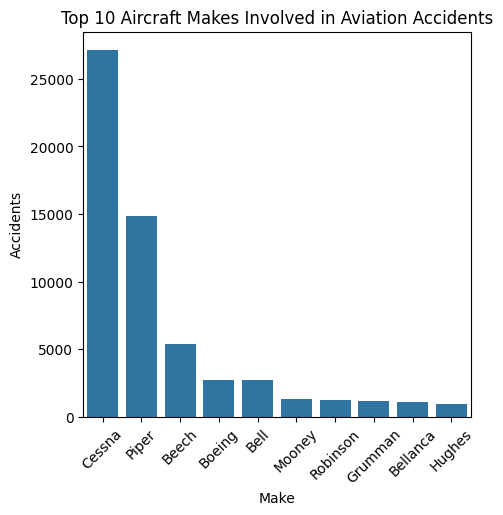

In [95]:
#The code below will plot and display a visualization based on top 10 Aircraft makes with the most accident
make_counts = df1['Make'].value_counts().head(10)#Selecting the top 10 makes
plt.figure(figsize=(5,5 ))#Selecting the figure size of the visualiztion
sns.barplot(x=make_counts.index, y=make_counts.values)#Selecting the x-axis and y-axis for a bargraph
plt.title('Top 10 Aircraft Makes Involved in Aviation Accidents')#Selecting the title of the visualization
plt.xlabel('Make')#Selecting the x-axis title
plt.ylabel('Accidents')#Selecting the y-axis title
plt.xticks(rotation=45)#selecting the label format for each category on the x-axis(This to avoid overlapping)
plt.show()#plots and visualizes the image


### Analysis based on model 

We can further our analysis by visualizing models of aircrafts and checking how prone they are to aircraft accidents. I wrote a code based on top fifteen models that have recorded the most aircraft accidents. I did so by developing the code below to make the appropriate visualizations for analysis

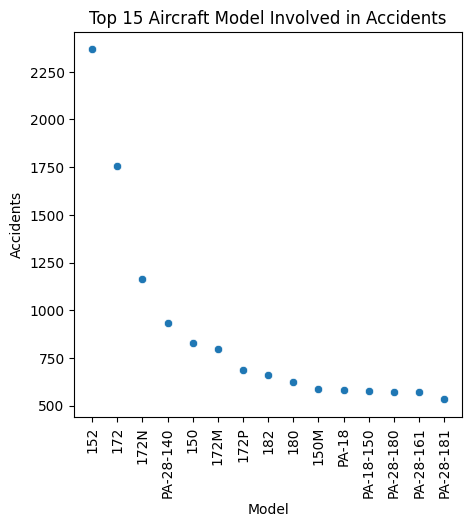

In [97]:
#The code below will plot and display a visualization based on top 10 Aircraft makes with the most accident
model_counts = df1['Model'].value_counts().head(15)#Selecting the top 15 models
plt.figure(figsize=(5,5))#Selecting the figure size for the visualization
sns.scatterplot(x=model_counts.index, y=model_counts.values)#Selecting the x-axis and y-axis for my scatterplot
plt.title('Top 15 Aircraft Model Involved in Accidents')#Title for the visualization
plt.xlabel('Model')#Title for the x-axis
plt.ylabel('Accidents')#Title for the y-axis
plt.xticks(rotation=90)##selecting the label format for each category on the x-axis(This to avoid overlapping)
plt.show()#plots and visualizes the image


### Analysis based on aircraft category:

We can further our analysis by visualizating which category of aircrafts have the most aviation accident by following the procedures below:

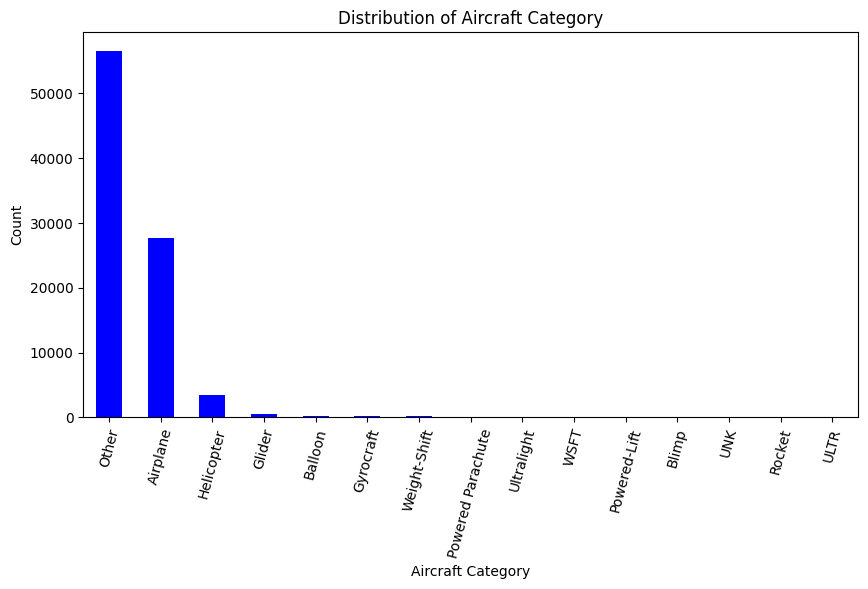

In [104]:
# #The code below will plot and display a visualization based on Aircraft category with the most accident
plt.figure(figsize=(6,6))#Display figure size
df1['Aircraft Category'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')#An alternative code to plot the bargraph
plt.title('Distribution of Aircraft Category')#title
plt.ylabel('Count')#y axis label
plt.xlabel('Aircraft Category')#x axis label
plt.xticks(rotation=75)
plt.show()#Image display


### Analysis based on Air Carrier

We can further our analysis by visualizing which company's air carrier has the most occurances of aviation accidents as illustrated below:

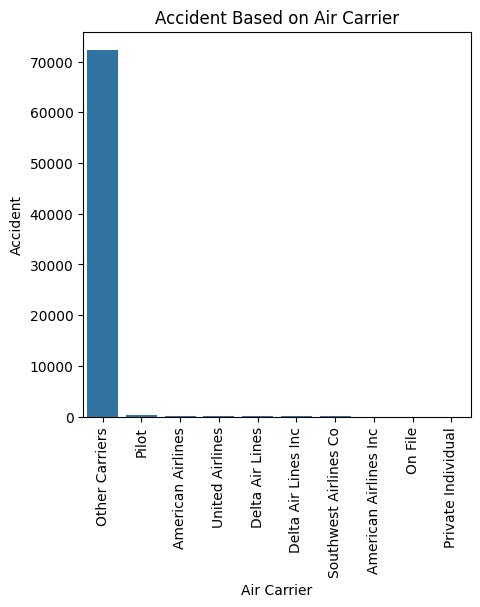

In [102]:
#Key in the code for aircraft-carriers and accident occurances
air_carrier=df1["Air Carrier"].value_counts().head(10)#selecting top 10 air carriers
plt.figure(figsize=(5,5))#Selecting the figure size
sns.barplot(x=air_carrier.index,y=air_carrier.values)#plotting the bar graph
plt.title("Accident Based on Air Carrier")#selecting the title for the visualization
plt.xlabel("Air Carrier")#x-axis title
plt.ylabel("Accident")#y-label title
plt.xticks(rotation=90);#selecting label type for the x-axis

### Analysis based on Broad Phase of Flight

Analyzing using Broad Phase of Flight is of great importance for our analysis to be familiar under what phase do accidents occur is it during take-off, approach or landing. We can see when, by plotting our visualization below:

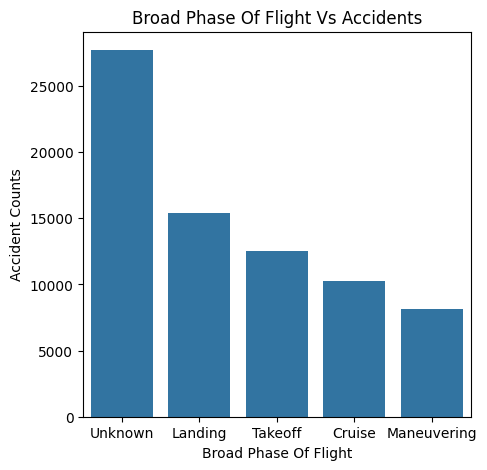

In [105]:
#Code for analysis for top 5 broad of flights where accidents occur
phase_flight=df1["Broad Phase Of Flight"].value_counts().head(5)#selecting the top five
plt.figure(figsize=(5,5))#Selecting the figure size
sns.barplot(x=phase_flight.index, y=phase_flight.values)#plotting the bargraph
plt.title("Broad Phase Of Flight Vs Accidents")#title for the visualization
plt.xlabel("Broad Phase Of Flight")#x-axis title
plt.ylabel("Accident Counts")#y-axis title
plt.show()#isualization


### Analysis based on countries:

We can further our analysis by checking which top five countries has the  most number of accidendt as recorded by the NTSB.

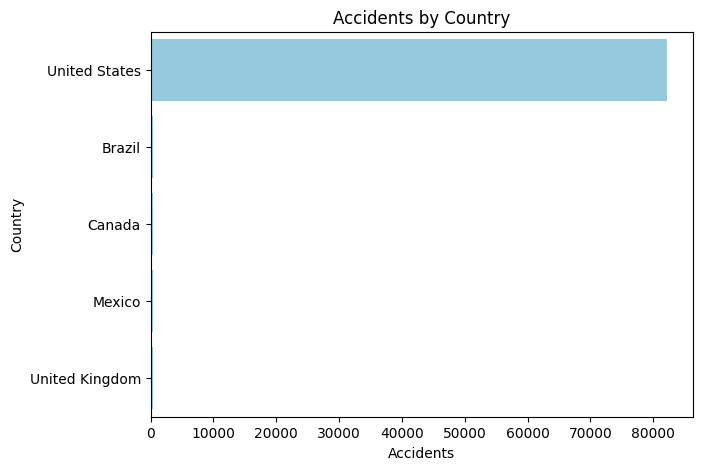

In [67]:
#Accidents by the top five countries
country_accidents = df1['Country'].value_counts().head(5)
plt.figure(figsize=(7,5))
sns.barplot(x=country_accidents.values, y=country_accidents.index, orient='h',color="skyblue")
plt.title('Accidents by Country')
plt.xlabel('Accidents')
plt.ylabel('Country');


### Analysis based on fatality vs countries

The visualization below will indicate which top 10 countries have recorded the most fatalities on their soil or atmosphere.

C:\Users\123\AppData\Local\Temp\ipykernel_6620\3388591712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Fatal Injuries', data=plot_data, palette='Blues')


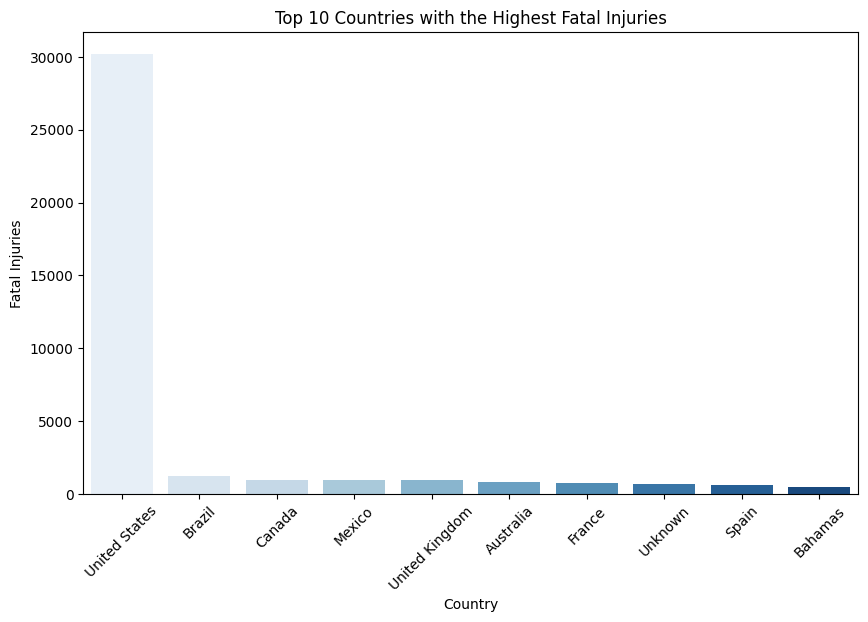

In [93]:
# Grouping and sorting the categories
country_injury = df1['Country'].value_counts().head(10)  # top 10 countries by injury
#we will be statistical value.sum() and groupby to group the two categories "Country and Fatalities"
fatal_injury = df1.groupby('Country')['Total Fatal Injuries'].sum().sort_values(ascending=False).head(10)
# Creating the bar plot
plt.figure(figsize=(10, 6))#selecting the figure size
sns.barplot(x='Country', y='Fatal Injuries', data=plot_data, palette='Blues')#plotting the bar graph
plt.xticks(rotation=45)
plt.title('Top 10 Countries with the Highest Fatal Injuries')
plt.show()



### Analysis on accidents based on locations

Furhther did analysis on accidents based on their locations

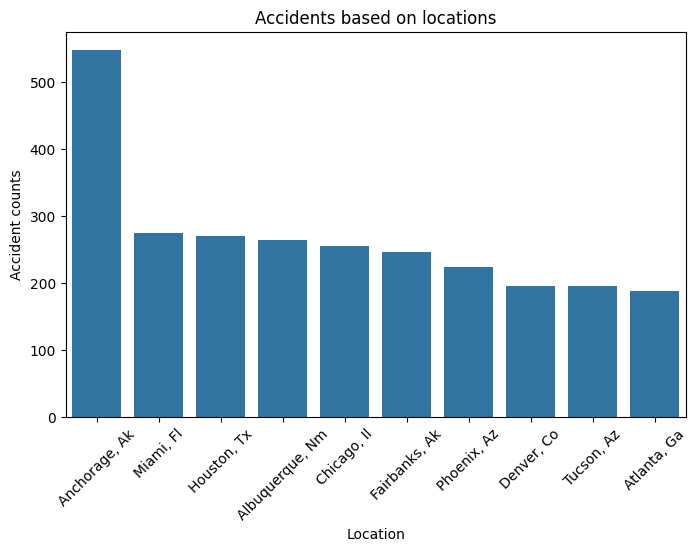

In [106]:
location_accident=df1["Location"].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=location_accident.index, y=location_accident.values)
plt.title("Accidents based on locations")
plt.xlabel('Location')
plt.ylabel("Accident counts")
plt.xticks(rotation=45)
plt.show()




### Analysis based on Investigation type

We can further visualize on what was based on the investigation type it can either be an accident or an incident

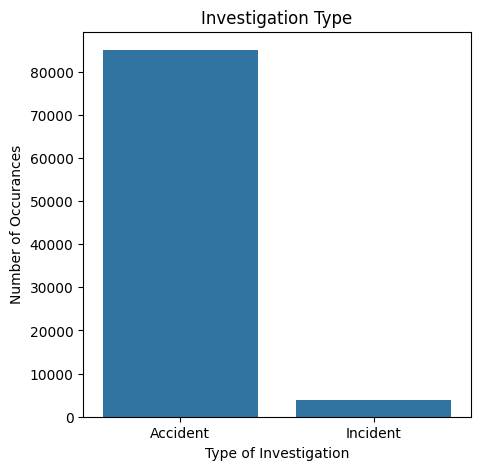

In [68]:
Investigation_type=df1['Investigation Type'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=Investigation_type.index,y=Investigation_type.values)
plt.xlabel("Type of Investigation")
plt.ylabel("Number of Occurances")
plt.title("Investigation Type");


### Analysis based on Injury types

We can check analysis based on the injury type and view whci one has the most occurances

C:\Users\123\AppData\Local\Temp\ipykernel_6620\1086983728.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Injury Type', y='Count', data=injury_df, palette='Blues')


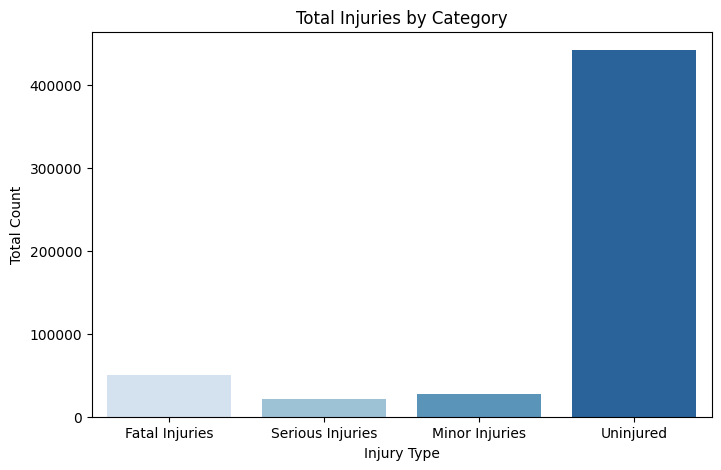

In [99]:
# sum and aggregate injury counts for each category
injury_counts = {
    'Fatal Injuries': df1['Total Fatal Injuries'].sum(),
    'Serious Injuries': df1['Total Serious Injuries'].sum(),
    'Minor Injuries': df1['Total Minor Injuries'].sum(),
    'Uninjured': df1['Total Uninjured'].sum()
}


# Plotting the data
plt.figure(figsize=(8, 5))
sns.barplot(x='Injury Type', y='Count', data=injury_df, palette='Blues')
plt.title('Total Injuries by Category')
plt.ylabel('Total Count')
plt.show()


### Analysing accidents yearly

We can further do analysis and analyize how accidents have been fairing on over the past decades

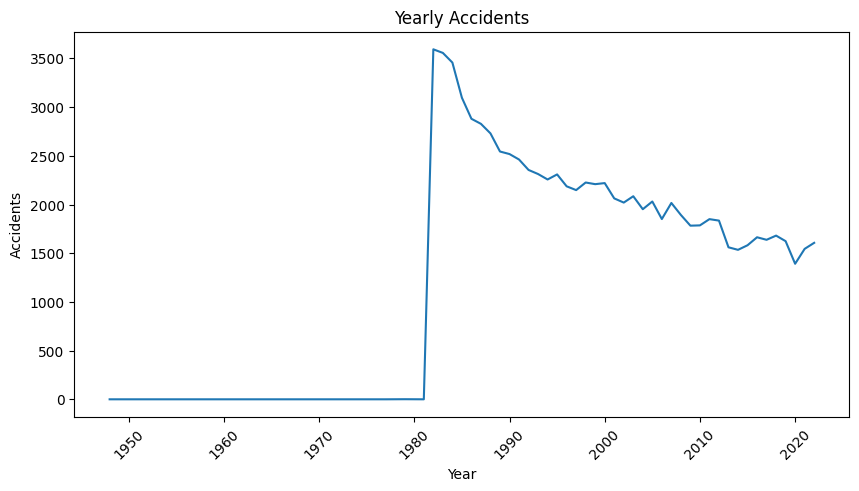

In [66]:
#Accidents occuring yearly
df1['Year'] = pd.to_datetime(df1['Event Date'].str.strip()).dt.year#selecting the dates based on the years
yearly_accidents = df1['Year'].value_counts().sort_index()#sorting in index form
plt.figure(figsize=(10, 5))#Selecting the figure size
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values)#plotting a line plot 
plt.title('Yearly Accidents')#title
plt.xlabel('Year')#x-axis label
plt.ylabel('Accidents')#y-axis label
plt.xticks(rotation=45);